<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio EDA y Gestión de Nulos

AutoRenew, una empresa líder en la venta de coches de segunda mano, te ha contratado para desarrollar un modelo predictivo que estime el precio de los vehículos usados. Este modelo ayudará a la empresa a mejorar sus estrategias de ventas, marketing y optimización del inventario. Para ello, cuentas con un conjunto de datos que contiene información detallada sobre diversas características de los coches usados. Sin embargo, como es común en conjuntos de datos reales, encontrarás valores nulos y necesitarás realizar un análisis exploratorio para identificar patrones, correlaciones y posibles anomalías.

 En este laboratorio, tu tarea es realizar un análisis exploratorio de los datos (EDA) y gestionar los valores nulos que encuentres. Este es solo el primer paso de un proyecto que se desarrollará durante toda la semana, en el que usarás este mismo conjunto de datos para practicar diferentes fases del preprocesamiento.

**Columnas del conjunto de datos:**

- **dateCrawled**: Fecha y hora en que se recolectaron los datos del coche.

- **name**: Nombre del anuncio, generalmente incluye la marca y el modelo del coche.

- **seller**: Tipo de vendedor (particular o concesionario).

- **offerType**: Tipo de oferta (venta o subasta).

- **price**: Precio del coche en la moneda local.

- **abtest**: Campo utilizado para pruebas A/B, indicando diferentes versiones del sitio web o anuncio.

- **vehicleType**: Tipo de vehículo (sedán, SUV, hatchback, etc.).

- **yearOfRegistration**: Año de registro del coche.

- **gearbox**: Tipo de caja de cambios (manual o automática).

- **powerCV**: Potencia del coche en caballos de vapor (CV).

- **model**: Modelo específico del coche.

- **kilometer**: Kilometraje total del coche.

- **monthOfRegistration**: Mes de registro del coche.

- **fuelType**: Tipo de combustible (gasolina, diésel, eléctrico, etc.).

- **brand**: Marca del coche.

- **notRepairedDamage**: Indica si el coche tiene daños no reparados.

- **dateCreated**: Fecha de creación del anuncio.

- **nrOfPictures**: Número de fotos en el anuncio.

- **postalCode**: Código postal de la ubicación del coche.

- **lastSeen**: Última fecha y hora en que el anuncio fue visto.

**Instrucciones:**

1. **Análisis Exploratorio de Datos (EDA):** Explora el conjunto de datos para familiarizarte con las diferentes características de los coches. Utiliza gráficos y estadísticas descriptivas para identificar patrones, tendencias y posibles anomalías.
   
2. **Gestión de Valores Nulos:** Identifica las columnas que contienen valores nulos y aplica las técnicas adecuadas para manejarlos. Esto podría incluir la imputación de valores, eliminación de filas o columnas, o cualquier otra estrategia que consideres apropiada.

**Nota:** Este laboratorio es el primer paso de una serie de actividades que realizarás esta semana utilizando el mismo conjunto de datos. Asegúrate de documentar bien tu trabajo, ya que lo utilizarás como base para los siguientes ejercicios.


In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Otros objetivos
# -----------------------------------------------------------------------
import math
import sys
import os
sys.path.append('C:\\Users\\DELL\\Git\\Lab_EDA_Gestion_Nulos\\src') #pongo los 2 puntos para que salga de la carpeta
import src.funciones as f
# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
pd.set_option('display.max_columns', None)

La mayor cantidad de nulos está en dos variables: vehicleType (36.00%), notRepairedDamage (19.40%).

- El coche con más aparición es el Ford Fiesta.
- El tipo de coche más encontrado es small car.
- Hay más coches manuales que automáticos.
- El modelo más encontrado es el golf.
- El fuelType más encontrado es petrol.
- La marca más encontrada es es Volskwagen.

### Datos
- Tenemos 371528 filas de datos
- Tenemos 20 columnas
- Nuestros datos están mayormente en 3 categorías: int, object y float.

### Duplicados
- Tenemos 4 duplicados (pendiente)

### Nulos
- 5 variables con nulos: vehicletype, gearbox, model fueltype, notrepaireddamage

#### Observaciones generales
- En la columna nrOfPictures, solo hay 0. Esta columna se va. Esto me va a generar un data frame de 19 columnas.
- Potencia hay atípicos.
- El precio tiene valores atípicos.
- El año de registro tiene valores atípicos.
- Tengo que pasar las columnas de fechas a datetime
- He creado dos columnas nuevas con el mes y año de datecreated

In [2]:
df = pd.read_csv('C:\\Users\\DELL\\Git\\Lab_EDA_Gestion_Nulos\\datos\\autorenew.csv')

In [3]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerCV,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,private,offer,480,test,NaN,1993,manually,0.0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,private,offer,18300,test,coupe,2011,manually,187.0,NaN,125000,5,diesel,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",private,offer,9800,test,suv,2004,automatic,161.0,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,private,offer,1500,test,small car,2001,manually,74.0,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,private,offer,3600,test,small car,2008,manually,68.0,fabia,90000,7,diesel,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [4]:
f.exploracion_dataframe(df, 'price')

El número de datos es 371528 y el de columnas es 20

 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 4

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos
vehicleType,36.003478
gearbox,5.439429
model,5.513447
fuelType,8.986133
notRepairedDamage,19.395577



 ..................... 

Los tipos de las columnas son:


,tipo_dato
dateCrawled,object
name,object
seller,object
offerType,object
price,int64
abtest,object
vehicleType,object
yearOfRegistration,int64
gearbox,object
powerCV,float64



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna dateCrawled tiene las siguientes valore únicos:


,count
dateCrawled,
2016-03-24 14:49:47,7
2016-03-19 21:49:56,6
2016-03-26 22:57:31,6
2016-03-22 10:42:10,5
2016-04-01 16:52:05,5
...,...
2016-03-20 15:56:21,1
2016-03-14 03:22:32,1
2016-03-14 22:52:34,1


La columna name tiene las siguientes valore únicos:


,count
name,
Ford_Fiesta,657
BMW_318i,627
Opel_Corsa,622
Volkswagen_Golf_1.4,603
BMW_316i,523
...,...
Audi_A4_Avant_Klima_Gruene_Plakette_TÜV_&AU_NEU_XENON,1
Renault_clio_in_gold_450VB_!!,1
Fiat_Doblo_1.6_Multijet,1


La columna seller tiene las siguientes valore únicos:


,count
seller,
private,371525
commercial,3


La columna offerType tiene las siguientes valore únicos:


,count
offerType,
offer,371516
request,12


La columna abtest tiene las siguientes valore únicos:


,count
abtest,
test,192585
control,178943


La columna vehicleType tiene las siguientes valore únicos:


,count
vehicleType,
small car,80023
combi,67564
bus,30201
convertible,22898
coupe,19015
suv,14707
other,3357


La columna gearbox tiene las siguientes valore únicos:


,count
gearbox,
manually,274214
automatic,77105


La columna model tiene las siguientes valore únicos:


,count
model,
golf,30070
andere,26400
3er,20567
polo,13092
corsa,12573
...,...
serie_2,8
rangerover,6
serie_3,4


La columna fuelType tiene las siguientes valore únicos:


,count
fuelType,
petrol,223857
diesel,107746
lpg,5378
cng,571
hybrid,278
other,208
electro,104


La columna brand tiene las siguientes valore únicos:


,count
brand,
volkswagen,79640
bmw,40274
opel,40136
mercedes_benz,35309
audi,32873
ford,25573
renault,17969
peugeot,11027
fiat,9676


La columna notRepairedDamage tiene las siguientes valore únicos:


,count
notRepairedDamage,
no,263182
yes,36286


La columna dateCreated tiene las siguientes valore únicos:


,count
dateCreated,
2016-04-03 00:00:00,14450
2016-04-04 00:00:00,14022
2016-03-20 00:00:00,13547
2016-03-12 00:00:00,13379
2016-03-21 00:00:00,13305
...,...
2016-01-14 00:00:00,1
2015-11-13 00:00:00,1
2015-08-07 00:00:00,1


La columna lastSeen tiene las siguientes valore únicos:


,count
lastSeen,
2016-04-07 06:45:59,17
2016-04-06 13:45:54,17
2016-04-07 06:45:12,16
2016-04-06 08:46:30,16
2016-04-06 17:46:58,16
...,...
2016-03-20 02:44:53,1
2016-03-29 20:39:13,1
2016-04-05 04:18:17,1


In [5]:
df_num, df_cat = f.separar_dataframe(df)

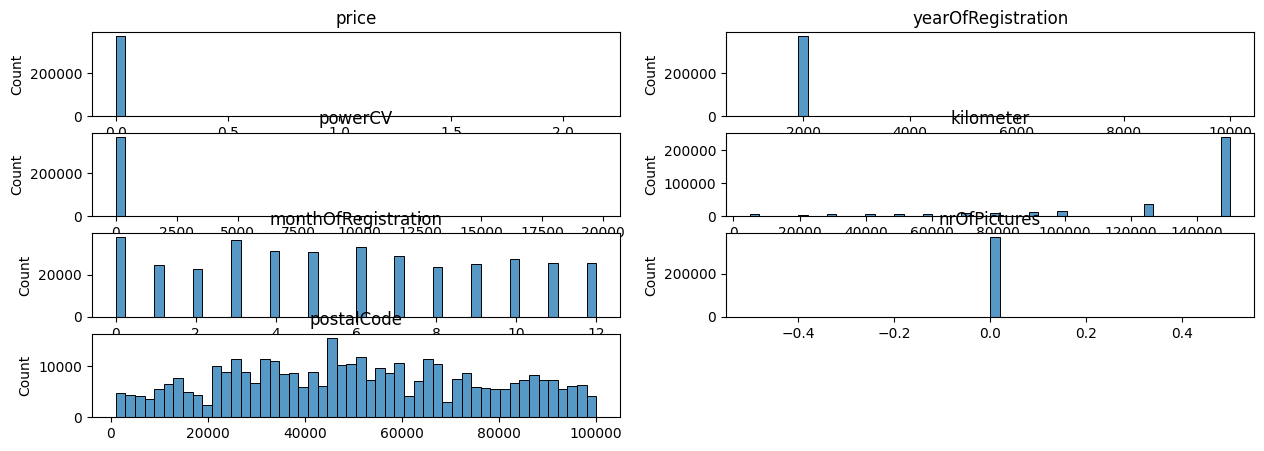

In [6]:
f.plot_numericas(df_num)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dateCrawled          371528 non-null  object 
 1   name                 371528 non-null  object 
 2   seller               371528 non-null  object 
 3   offerType            371528 non-null  object 
 4   price                371528 non-null  int64  
 5   abtest               371528 non-null  object 
 6   vehicleType          237765 non-null  object 
 7   yearOfRegistration   371528 non-null  int64  
 8   gearbox              351319 non-null  object 
 9   powerCV              371528 non-null  float64
 10  model                351044 non-null  object 
 11  kilometer            371528 non-null  int64  
 12  monthOfRegistration  371528 non-null  int64  
 13  fuelType             338142 non-null  object 
 14  brand                371528 non-null  object 
 15  notRepairedDamage

In [8]:
df['dateCreated'] = pd.to_datetime(df['dateCreated'])
df['dateCrawled'] = pd.to_datetime(df['dateCrawled'])
df['lastSeen'] = pd.to_datetime(df['lastSeen'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   dateCrawled          371528 non-null  datetime64[ns]
 1   name                 371528 non-null  object        
 2   seller               371528 non-null  object        
 3   offerType            371528 non-null  object        
 4   price                371528 non-null  int64         
 5   abtest               371528 non-null  object        
 6   vehicleType          237765 non-null  object        
 7   yearOfRegistration   371528 non-null  int64         
 8   gearbox              351319 non-null  object        
 9   powerCV              371528 non-null  float64       
 10  model                351044 non-null  object        
 11  kilometer            371528 non-null  int64         
 12  monthOfRegistration  371528 non-null  int64         
 13  fuelType      

In [10]:
df['kilometer'] = df['kilometer'].astype('O')

In [11]:
df['postalCode'] = df['postalCode'].astype('O')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   dateCrawled          371528 non-null  datetime64[ns]
 1   name                 371528 non-null  object        
 2   seller               371528 non-null  object        
 3   offerType            371528 non-null  object        
 4   price                371528 non-null  int64         
 5   abtest               371528 non-null  object        
 6   vehicleType          237765 non-null  object        
 7   yearOfRegistration   371528 non-null  int64         
 8   gearbox              351319 non-null  object        
 9   powerCV              371528 non-null  float64       
 10  model                351044 non-null  object        
 11  kilometer            371528 non-null  object        
 12  monthOfRegistration  371528 non-null  int64         
 13  fuelType      

In [13]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerCV,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,private,offer,480,test,NaN,1993,manually,0.0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,private,offer,18300,test,coupe,2011,manually,187.0,NaN,125000,5,diesel,audi,yes,2016-03-24,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",private,offer,9800,test,suv,2004,automatic,161.0,grand,125000,8,diesel,jeep,NaN,2016-03-14,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,private,offer,1500,test,small car,2001,manually,74.0,golf,150000,6,petrol,volkswagen,no,2016-03-17,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,private,offer,3600,test,small car,2008,manually,68.0,fabia,90000,7,diesel,skoda,no,2016-03-31,0,60437,2016-04-06 10:17:21


In [14]:
df['year_created'] = df['dateCreated'].dt.year
df['month_created'] = df['dateCreated'].dt.month

In [15]:
df.isna().sum()

dateCrawled                 0
name                        0
seller                      0
offerType                   0
price                       0
abtest                      0
vehicleType            133763
yearOfRegistration          0
gearbox                 20209
powerCV                     0
model                   20484
kilometer                   0
monthOfRegistration         0
fuelType                33386
brand                       0
notRepairedDamage       72060
dateCreated                 0
nrOfPictures                0
postalCode                  0
lastSeen                    0
year_created                0
month_created               0
dtype: int64

In [16]:
df.duplicated().sum() #pendiente

4

In [17]:
df.shape

(371528, 22)

In [18]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
dateCrawled,371528,2016-03-21 13:30:31.202717184,2016-03-05 14:06:22,2016-03-13 12:51:46.500000,2016-03-21 18:36:22,2016-03-29 14:49:31.249999872,2016-04-07 14:36:58,NaN
price,371528.0,17295.141865,0.0,1150.0,2950.0,7200.0,2147483647.0,3587953.744411
yearOfRegistration,371528.0,2004.577997,1000.0,1999.0,2003.0,2008.0,9999.0,92.866598
powerCV,371528.0,113.967833,0.0,69.0,104.0,148.0,19726.0,189.516594
monthOfRegistration,371528.0,5.734445,0.0,3.0,6.0,9.0,12.0,3.712412
dateCreated,371528,2016-03-20 19:42:51.495015168,2014-03-10 00:00:00,2016-03-13 00:00:00,2016-03-21 00:00:00,2016-03-29 00:00:00,2016-04-07 00:00:00,NaN
nrOfPictures,371528.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lastSeen,371528,2016-03-30 03:37:50.548152832,2016-03-05 14:15:08,2016-03-23 11:32:10.500000,2016-04-03 23:17:15,2016-04-06 10:45:02,2016-04-07 14:58:51,NaN
year_created,371528.0,2015.999917,2014.0,2016.0,2016.0,2016.0,2016.0,0.009424
month_created,371528.0,3.160973,1.0,3.0,3.0,3.0,12.0,0.377478


Se puede observar que en la columna nrOfPictures solo hay 0 como valor.

In [19]:
df.drop(columns='nrOfPictures', inplace=True)

In [20]:
df.shape

(371528, 21)

In [21]:
df.describe(include='O').T

,count,unique,top,freq
name,371528,233531,Ford_Fiesta,657
seller,371528,2,private,371525
offerType,371528,2,offer,371516
abtest,371528,2,test,192585
vehicleType,237765,7,small car,80023
gearbox,351319,2,manually,274214
model,351044,251,golf,30070
kilometer,371528,13,150000,240797
fuelType,338142,7,petrol,223857
brand,371528,40,volkswagen,79640


In [22]:
f.exploracion_dataframe(df, 'price')

El número de datos es 371528 y el de columnas es 21

 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 4

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos
vehicleType,36.003478
gearbox,5.439429
model,5.513447
fuelType,8.986133
notRepairedDamage,19.395577



 ..................... 

Los tipos de las columnas son:


,tipo_dato
dateCrawled,datetime64[ns]
name,object
seller,object
offerType,object
price,int64
abtest,object
vehicleType,object
yearOfRegistration,int64
gearbox,object
powerCV,float64



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna name tiene las siguientes valore únicos:


,count
name,
Ford_Fiesta,657
BMW_318i,627
Opel_Corsa,622
Volkswagen_Golf_1.4,603
BMW_316i,523
...,...
Audi_A4_Avant_Klima_Gruene_Plakette_TÜV_&AU_NEU_XENON,1
Renault_clio_in_gold_450VB_!!,1
Fiat_Doblo_1.6_Multijet,1


La columna seller tiene las siguientes valore únicos:


,count
seller,
private,371525
commercial,3


La columna offerType tiene las siguientes valore únicos:


,count
offerType,
offer,371516
request,12


La columna abtest tiene las siguientes valore únicos:


,count
abtest,
test,192585
control,178943


La columna vehicleType tiene las siguientes valore únicos:


,count
vehicleType,
small car,80023
combi,67564
bus,30201
convertible,22898
coupe,19015
suv,14707
other,3357


La columna gearbox tiene las siguientes valore únicos:


,count
gearbox,
manually,274214
automatic,77105


La columna model tiene las siguientes valore únicos:


,count
model,
golf,30070
andere,26400
3er,20567
polo,13092
corsa,12573
...,...
serie_2,8
rangerover,6
serie_3,4


La columna kilometer tiene las siguientes valore únicos:


,count
kilometer,
150000,240797
125000,38067
100000,15920
90000,12523
80000,11053
70000,9773
60000,8669
50000,7615
5000,7069


La columna fuelType tiene las siguientes valore únicos:


,count
fuelType,
petrol,223857
diesel,107746
lpg,5378
cng,571
hybrid,278
other,208
electro,104


La columna brand tiene las siguientes valore únicos:


,count
brand,
volkswagen,79640
bmw,40274
opel,40136
mercedes_benz,35309
audi,32873
ford,25573
renault,17969
peugeot,11027
fiat,9676


La columna notRepairedDamage tiene las siguientes valore únicos:


,count
notRepairedDamage,
no,263182
yes,36286


La columna postalCode tiene las siguientes valore únicos:


,count
postalCode,
10115,828
65428,637
66333,349
38518,326
44145,323
...,...
67693,1
95367,1
63874,1


In [23]:
df_num = df.select_dtypes(include= np.number)

In [24]:
cols_numericas = df_num.columns

In [25]:
cols_numericas

Index(['price', 'yearOfRegistration', 'powerCV', 'monthOfRegistration',
       'year_created', 'month_created'],
      dtype='object')

In [26]:
df_num, df_cat = f.separar_dataframe(df)

In [27]:
df['price'].max()

2147483647

In [28]:
# f.plot_categoricas(df_cat)

In [29]:
df['price'] = df['price'].replace(0,np.nan)
df['powerCV'] = df['powerCV'].replace(0,np.nan)
df['monthOfRegistration'] = df['monthOfRegistration'].replace(0,np.nan)

In [30]:
df['powerCV'].describe()

count    330708.000000
mean        128.035128
std         196.338216
min           1.000000
25%          79.000000
50%         114.000000
75%         148.000000
max       19726.000000
Name: powerCV, dtype: float64

In [31]:
df.isna().sum()

dateCrawled                 0
name                        0
seller                      0
offerType                   0
price                   10778
abtest                      0
vehicleType            133763
yearOfRegistration          0
gearbox                 20209
powerCV                 40820
model                   20484
kilometer                   0
monthOfRegistration     37675
fuelType                33386
brand                       0
notRepairedDamage       72060
dateCreated                 0
postalCode                  0
lastSeen                    0
year_created                0
month_created               0
dtype: int64

In [32]:
df.sample(10)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerCV,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen,year_created,month_created
203425,2016-03-25 12:51:16,BMW_325ti_compact_Edition_Sport_Top_Zustand_18...,private,offer,10995.0,test,NaN,2004,manually,189.0,3er,100000,3.0,petrol,bmw,no,2016-03-25,4600,2016-04-06 14:18:26,2016,3
129956,2016-03-07 15:48:01,Renault_Grand_Scenic_1.9_dCi_Confort_Dynamique...,private,offer,1250.0,control,bus,2005,manually,118.0,andere,150000,3.0,diesel,renault,yes,2016-03-07,89278,2016-03-08 07:15:13,2016,3
249081,2016-03-09 11:46:40,Opel_Corsa_1.4_16V_Selection_110_Jahre,private,offer,5900.0,test,small car,2009,manually,89.0,corsa,40000,10.0,petrol,opel,no,2016-03-09,86480,2016-03-23 14:49:01,2016,3
183518,2016-03-26 13:42:06,MINI_MINI/JCW/NAVI/BI_XENON,private,offer,15499.0,control,small car,2011,manually,208.0,cooper,125000,10.0,petrol,mini,no,2016-03-26,33602,2016-04-06 01:16:22,2016,3
212059,2016-04-04 23:53:57,Porsche_Boxster_S_3.2_986__Bj._2001__TOPZUSTAN...,private,offer,16700.0,control,convertible,2001,manually,249.0,boxster,125000,5.0,petrol,porsche,no,2016-04-04,67550,2016-04-07 10:15:21,2016,4
336477,2016-03-08 00:36:19,Bmw_3er_323i_Compact_Schiebedach_Klima_Sitzhei...,private,offer,1000.0,control,coupe,1998,manually,197.0,3er,150000,4.0,petrol,bmw,yes,2016-03-08,13357,2016-03-14 17:15:36,2016,3
339442,2016-03-17 12:57:12,VW_T5_Carewella_2.5_TDI,private,offer,10600.0,test,bus,2009,NaN,129.0,andere,150000,NaN,diesel,volkswagen,no,2016-03-17,58730,2016-03-20 13:47:58,2016,3
125773,2016-04-04 17:54:57,Volkswagen_Golf,private,offer,2450.0,test,small car,1999,manually,148.0,golf,150000,5.0,petrol,volkswagen,no,2016-04-04,24109,2016-04-06 19:48:33,2016,4
321292,2016-03-07 17:36:56,Opel_Astra_1.6_Sportive,private,offer,1250.0,test,coupe,1999,manually,74.0,astra,150000,7.0,petrol,opel,no,2016-03-07,55595,2016-03-13 02:46:44,2016,3
194749,2016-03-06 12:38:17,TOYOTA_YARIS_VVT_I_SOL_1_3,private,offer,3850.0,test,small car,2006,manually,86.0,yaris,125000,5.0,petrol,toyota,no,2016-03-06,53859,2016-03-07 17:44:38,2016,3


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   dateCrawled          371528 non-null  datetime64[ns]
 1   name                 371528 non-null  object        
 2   seller               371528 non-null  object        
 3   offerType            371528 non-null  object        
 4   price                360750 non-null  float64       
 5   abtest               371528 non-null  object        
 6   vehicleType          237765 non-null  object        
 7   yearOfRegistration   371528 non-null  int64         
 8   gearbox              351319 non-null  object        
 9   powerCV              330708 non-null  float64       
 10  model                351044 non-null  object        
 11  kilometer            371528 non-null  object        
 12  monthOfRegistration  333853 non-null  float64       
 13  fuelType      

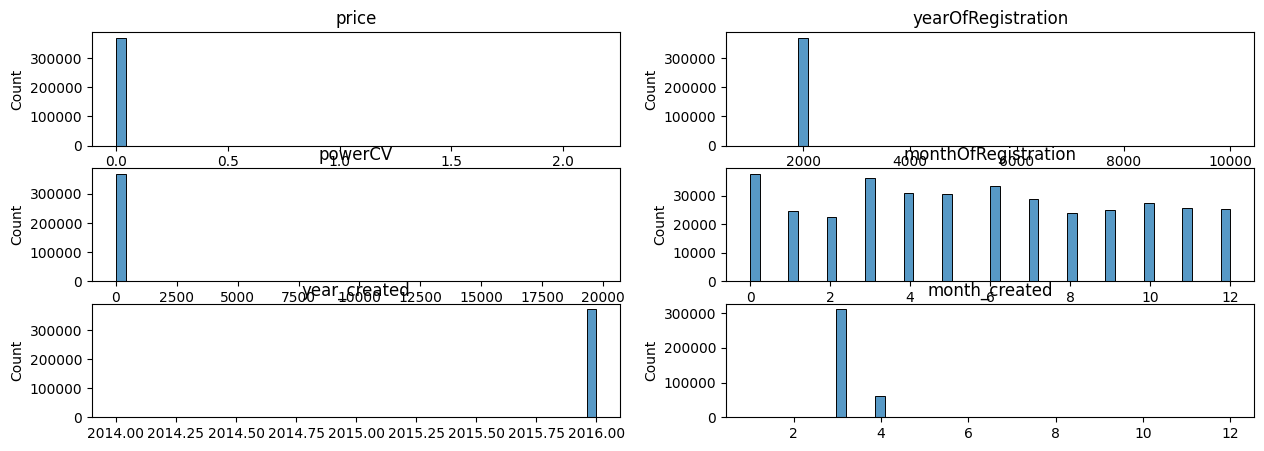

In [34]:
f.plot_numericas(df_num)

In [35]:
# f.plot_categoricas(df_cat)

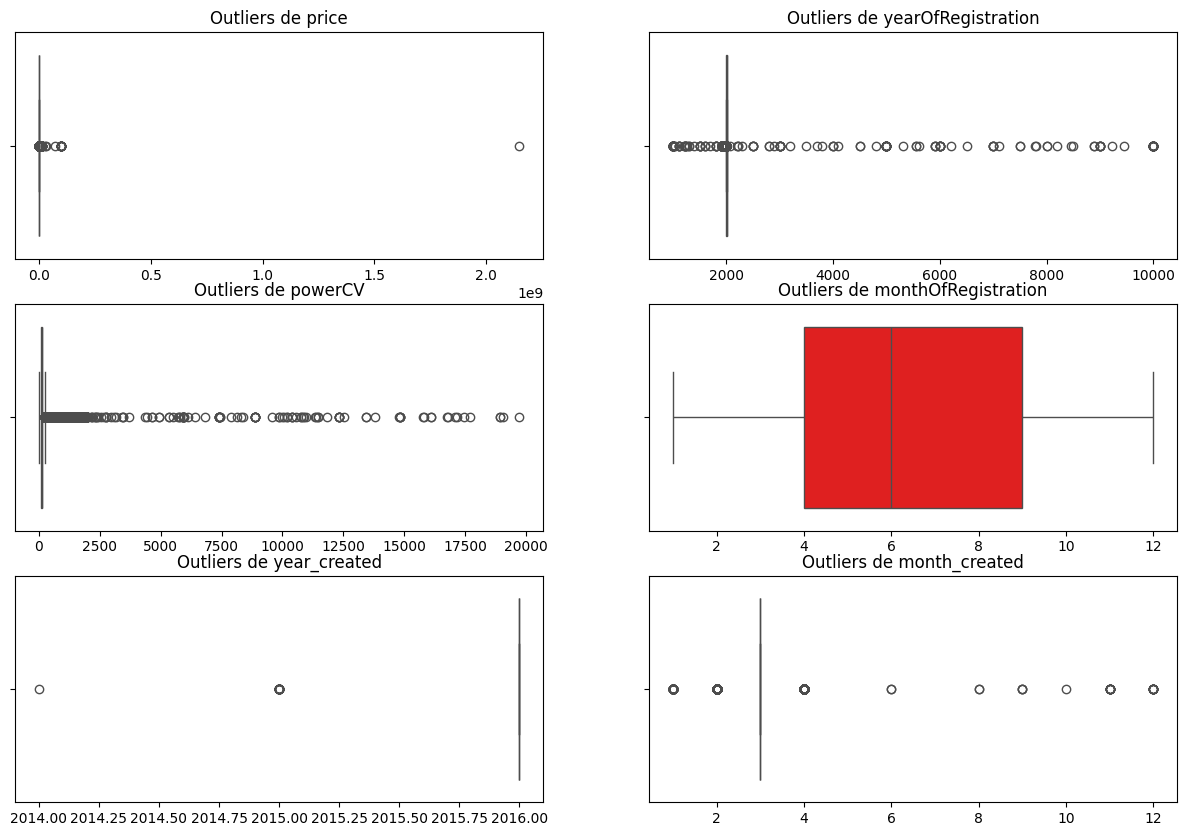

In [36]:
f.detectar_outliers(df)

Anotaciones en continuación, siguiendo lo que dije al principio:
- outliers de price, se presenta en notación científica porque tenemos un valor máximo de 2mil millones
- outliers de PowerCV, hay bastante datos atípicos
- year_created, tenemos datos del 2014 y 2015
yearofregistration, tenemos una concentración de datos en los años 2000 pero llegamos a tener valores de hasta 1000
- monthOfRegistration, tenemos una distribución clara de meses
- month_created, tenemos una cierta concentración en el mes 3 pero también tenemos datos en los demás meses

- Ya identificados, me cargo los valores que no tienen sentido.

c:\Users\DELL\Git\Lab_EDA_Gestion_Nulos\src\funciones.py:133: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=columna,
c:\Users\DELL\Git\Lab_EDA_Gestion_Nulos\src\funciones.py:133: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=columna,
c:\Users\DELL\Git\Lab_EDA_Gestion_Nulos\src\funciones.py:133: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=columna,
c:\Users\DELL\Git\Lab_EDA_Gestion_Nulos\src\funciones.py:133: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=columna,
c:\Users\DELL\Git\Lab_EDA_Gestion_Nulos\src\funciones.py:133: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=columna,


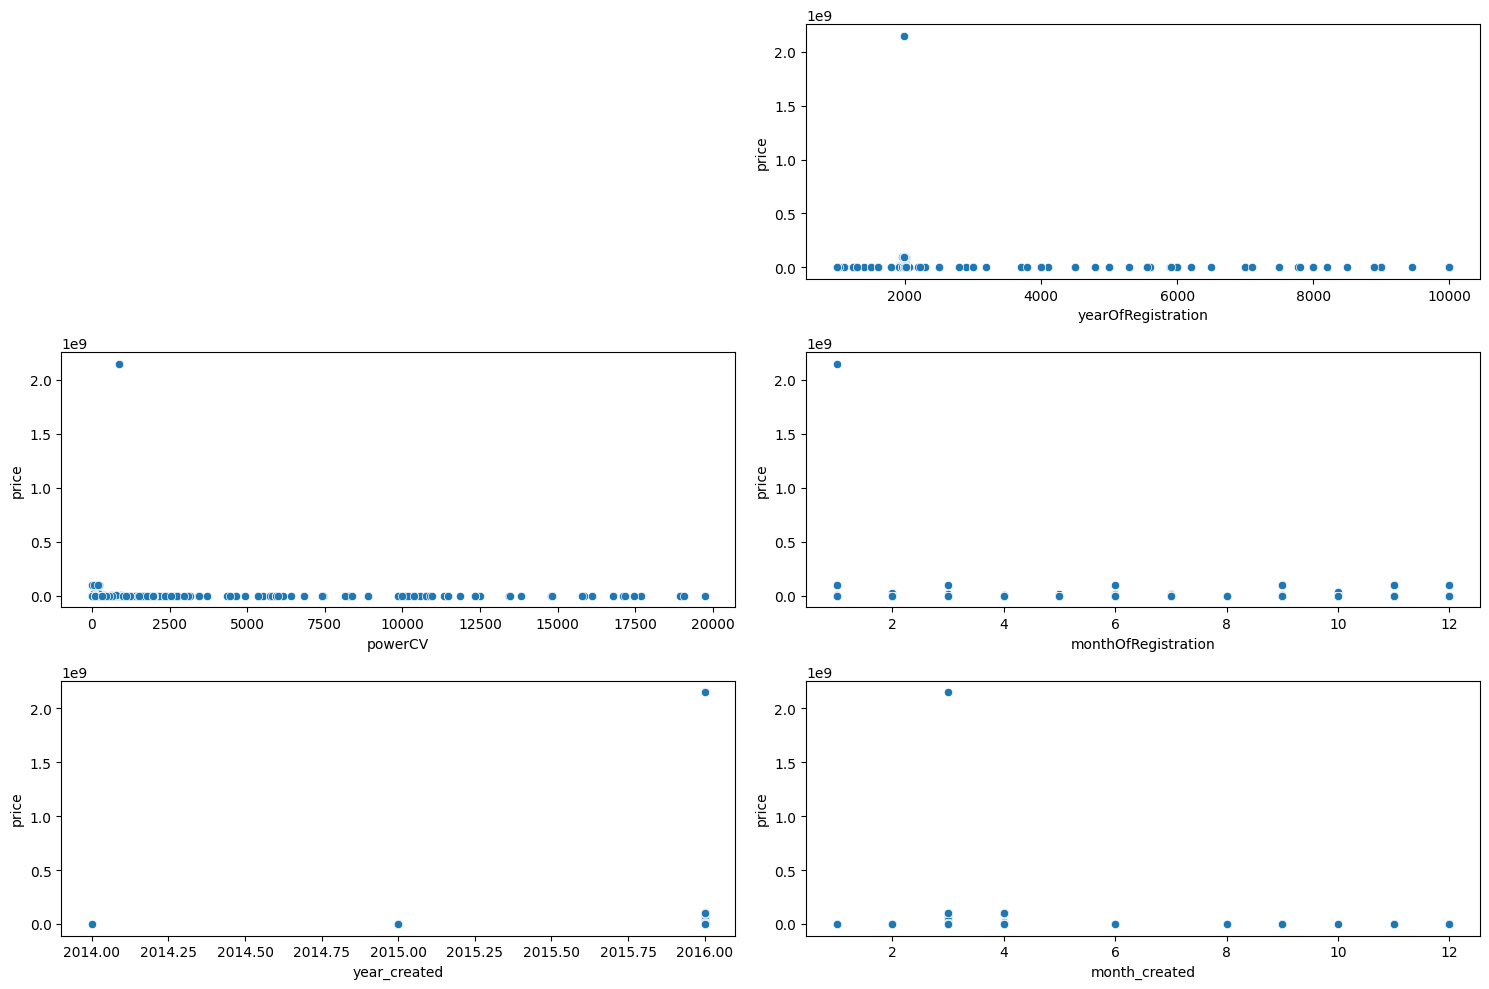

In [37]:
f.relacion_numericas(df, 'price')

In [38]:
df_year_ilog = (df["yearOfRegistration"] < 1900) | (df["yearOfRegistration"] >= 2025)
df.loc[df[df_year_ilog].index, "yearOfRegistration"] = np.nan

Decidí pasar por alto los valores de año de registro por debajo del 1900 y mayores a 2025. Esto para poder trabajar con datos más lógicos y poder dejar los datos restantes a evaluar.

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   dateCrawled          371528 non-null  datetime64[ns]
 1   name                 371528 non-null  object        
 2   seller               371528 non-null  object        
 3   offerType            371528 non-null  object        
 4   price                360750 non-null  float64       
 5   abtest               371528 non-null  object        
 6   vehicleType          237765 non-null  object        
 7   yearOfRegistration   371346 non-null  float64       
 8   gearbox              351319 non-null  object        
 9   powerCV              330708 non-null  float64       
 10  model                351044 non-null  object        
 11  kilometer            371528 non-null  object        
 12  monthOfRegistration  333853 non-null  float64       
 13  fuelType      

c:\Users\DELL\Git\Lab_EDA_Gestion_Nulos\src\funciones.py:133: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=columna,
c:\Users\DELL\Git\Lab_EDA_Gestion_Nulos\src\funciones.py:133: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=columna,
c:\Users\DELL\Git\Lab_EDA_Gestion_Nulos\src\funciones.py:133: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=columna,
c:\Users\DELL\Git\Lab_EDA_Gestion_Nulos\src\funciones.py:133: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=columna,
c:\Users\DELL\Git\Lab_EDA_Gestion_Nulos\src\funciones.py:133: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=columna,


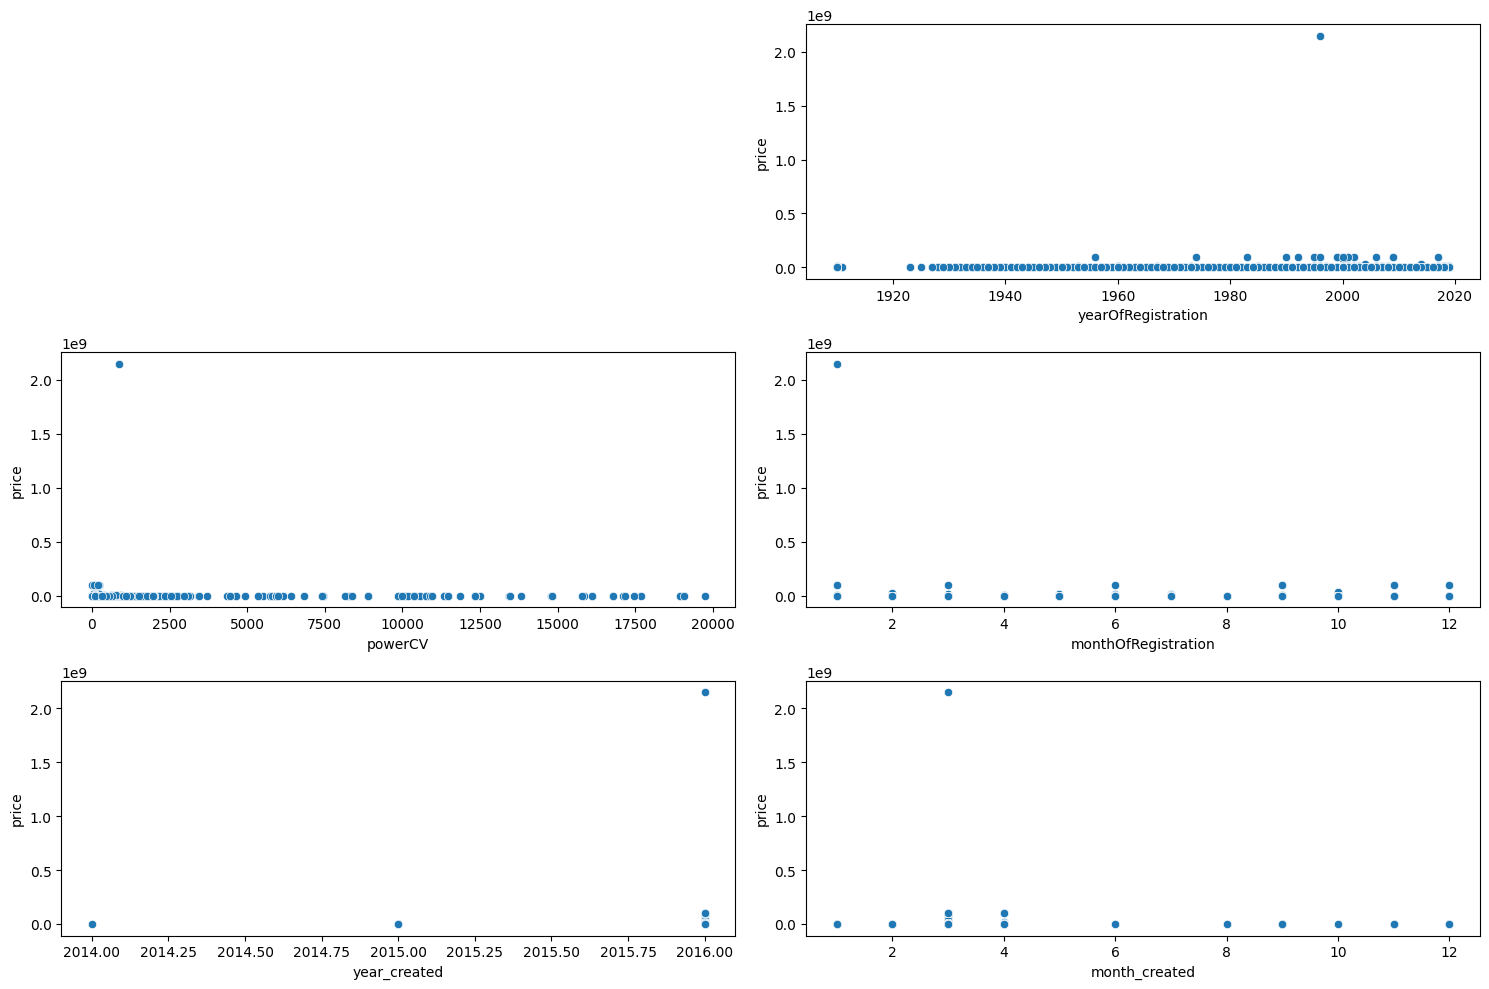

In [40]:
f.relacion_numericas(df, 'price')

In [41]:
df_power = (df["powerCV"] < 10) | (df["powerCV"] >= 1500)
df.loc[df[df_power].index, "powerCV"] = np.nan

He cargado los datos menores a 10 en powerCV en nulos y aquellos por encima del 1500, esto porque existen microcoches y además pueden haber coches que tengan más de 1500 caballos de fuerza en comparación con coches de carrera.

In [42]:
df[df['powerCV'] < 1]

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerCV,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen,year_created,month_created


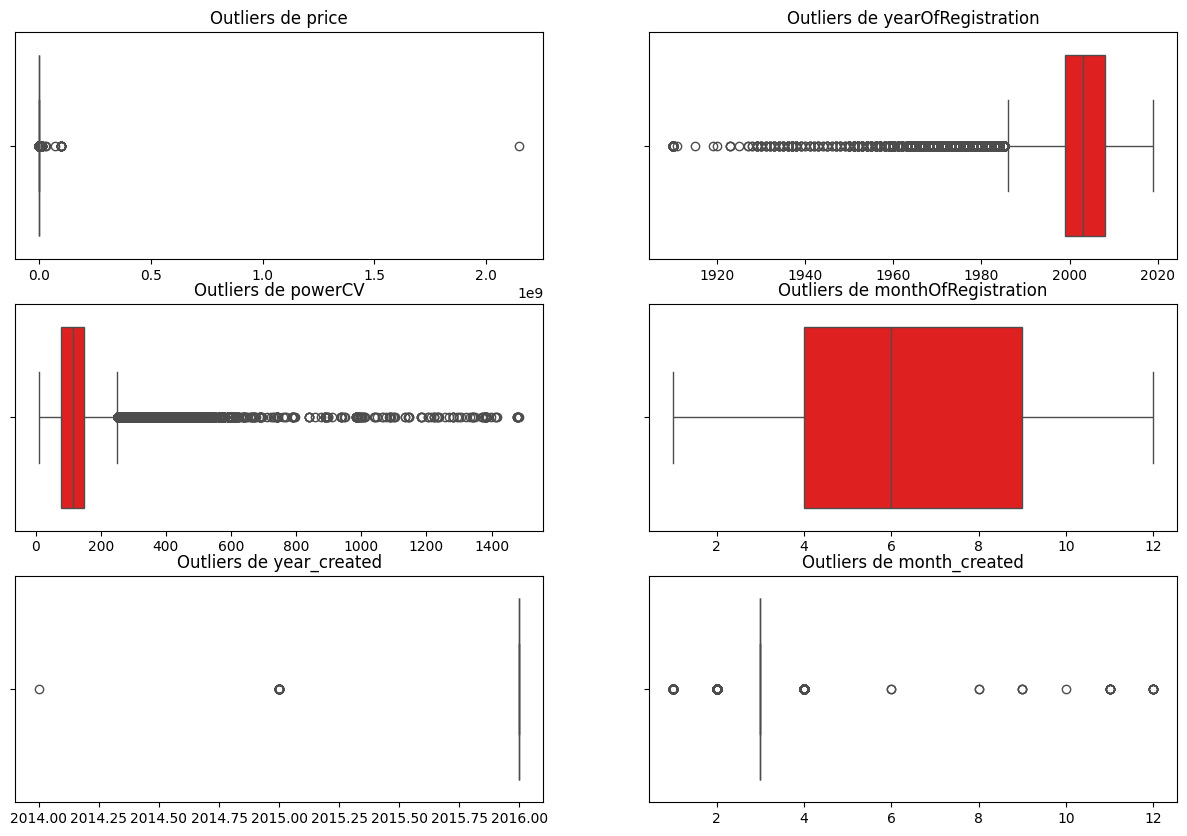

In [43]:
f.detectar_outliers(df)

In [44]:
df_price = (df["price"] < 10) | (df["price"] >= 50000000)
df.loc[df[df_price].index, "price"] = np.nan

In [45]:
df[df['price'] > 50000000]

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerCV,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen,year_created,month_created


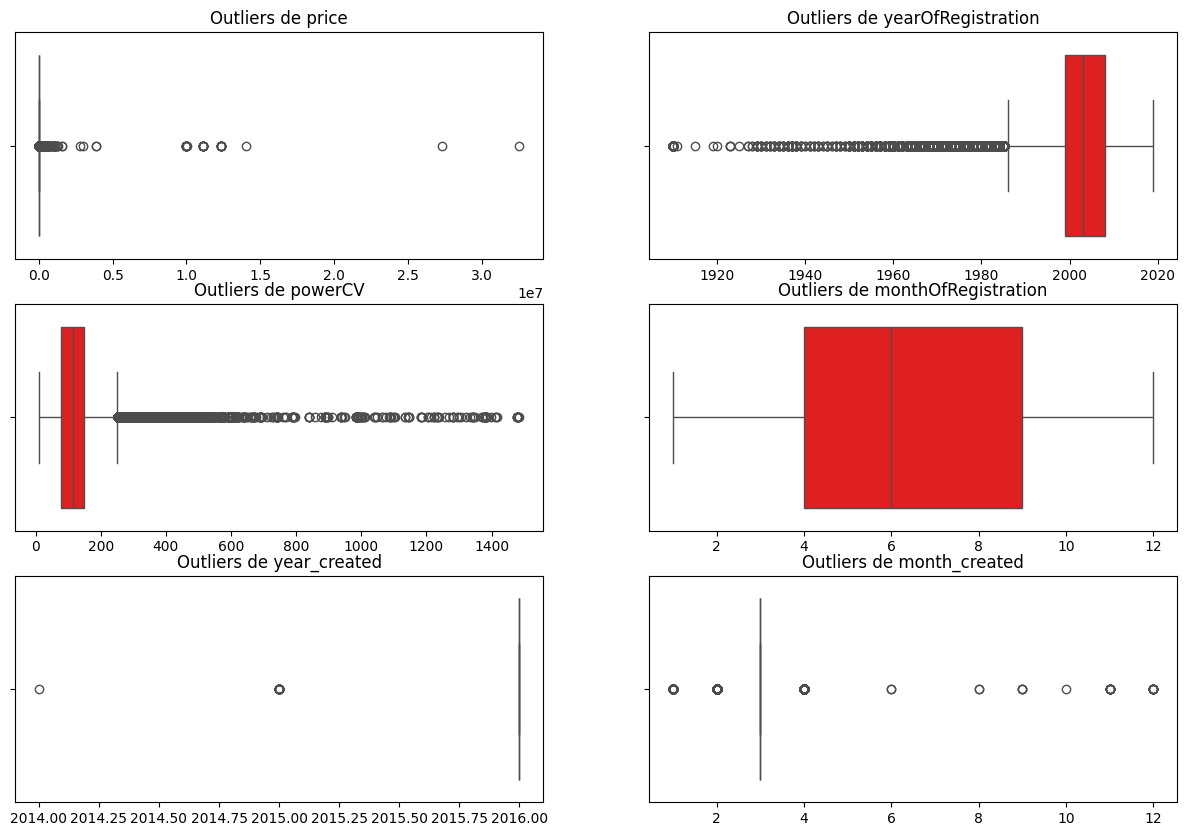

In [46]:
f.detectar_outliers(df)

c:\Users\DELL\Git\Lab_EDA_Gestion_Nulos\src\funciones.py:133: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=columna,
c:\Users\DELL\Git\Lab_EDA_Gestion_Nulos\src\funciones.py:133: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=columna,
c:\Users\DELL\Git\Lab_EDA_Gestion_Nulos\src\funciones.py:133: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=columna,
c:\Users\DELL\Git\Lab_EDA_Gestion_Nulos\src\funciones.py:133: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=columna,
c:\Users\DELL\Git\Lab_EDA_Gestion_Nulos\src\funciones.py:133: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=columna,


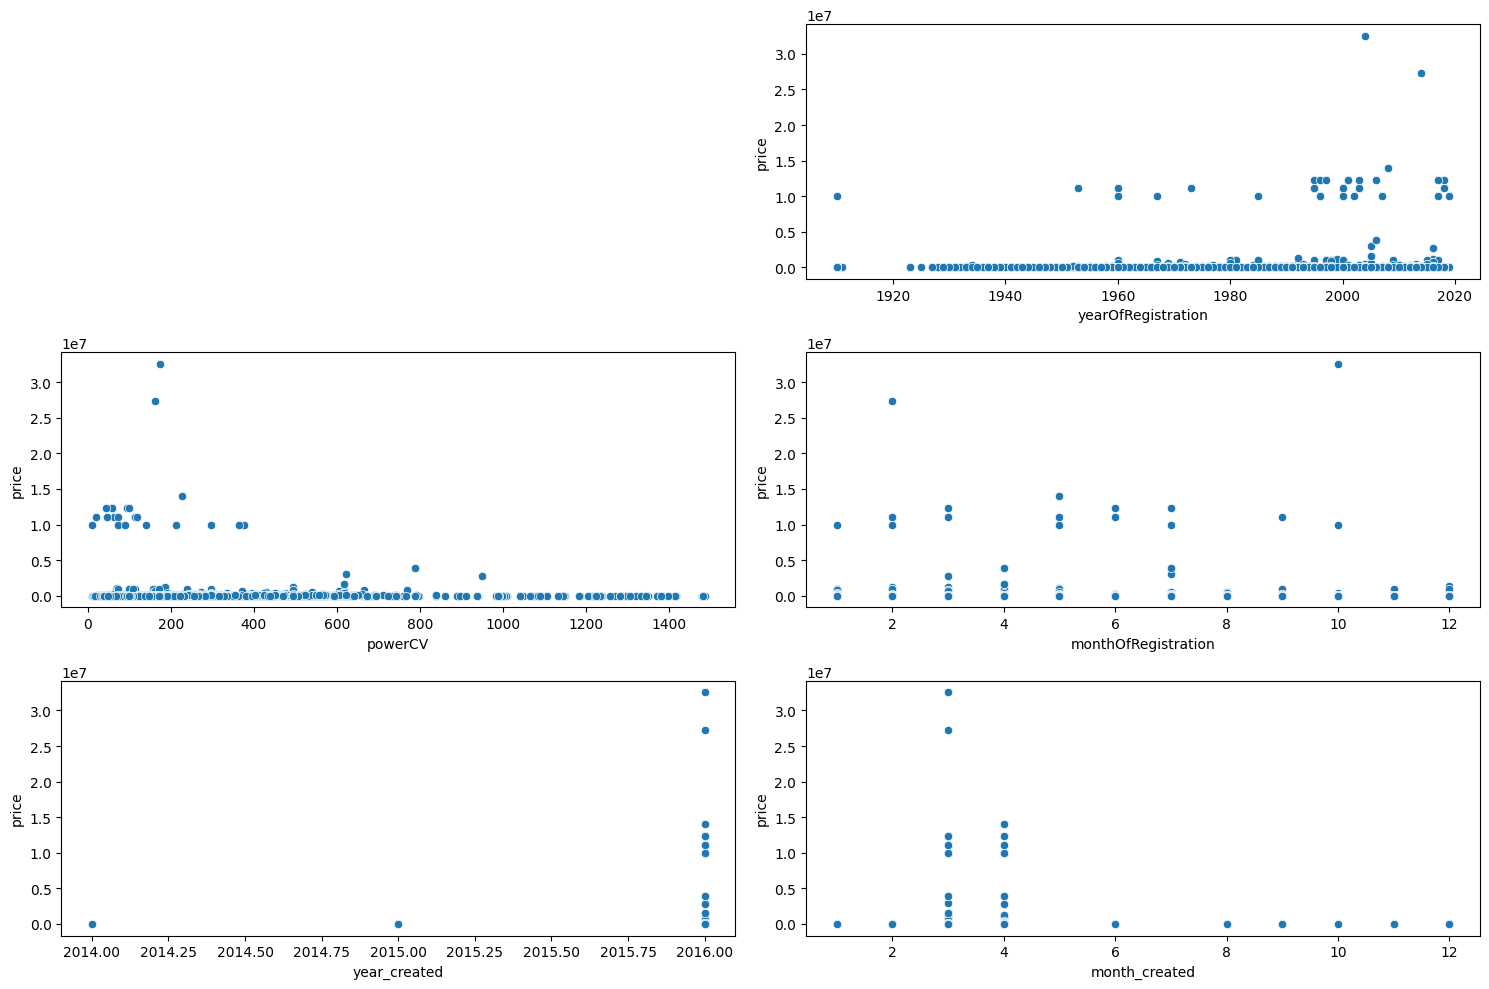

In [47]:
f.relacion_numericas(df, 'price')

Una vez hechos los cambios en relación con las numéricas, ya se pueden obsrvar relaciones en base a los precios.

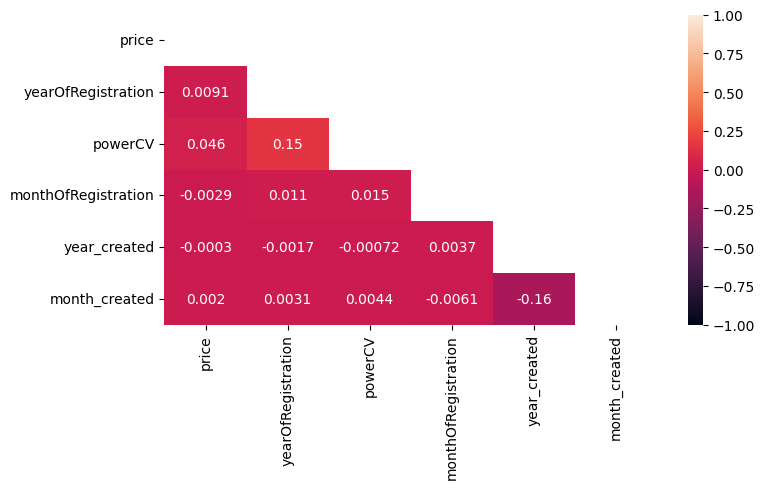

In [48]:
f.matriz_correacion(df)

### Cambios a categóricas

In [49]:
df['vehicleType'].isna().sum()

133763

In [50]:
df_vehiculo_ = pd.isna(df["vehicleType"])
df.loc[df_vehiculo_, "vehicleType"] = 'Desconocido'

In [51]:
df['vehicleType'].unique()

array(['Desconocido', 'coupe', 'suv', 'small car', 'convertible', 'bus',
       'combi', 'other'], dtype=object)

In [52]:
df['gearbox'].unique()

array(['manually', 'automatic', nan], dtype=object)

In [53]:
df_gearbox_ = pd.isna(df["gearbox"])
df.loc[df_gearbox_, "gearbox"] = 'Desconocido'

In [54]:
df_model_ = pd.isna(df["model"])
df.loc[df_model_, "model"] = 'Desconocido'

In [55]:
df_fuel_ = pd.isna(df["fuelType"])
df.loc[df_fuel_, "fuelType"] = 'Desconocido'

In [56]:
df_notR_ = pd.isna(df["notRepairedDamage"])
df.loc[df_notR_, "notRepairedDamage"] = 'Desconocido'

In [57]:
df.isna().sum()

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                  12052
abtest                     0
vehicleType                0
yearOfRegistration       182
gearbox                    0
powerCV                41242
model                      0
kilometer                  0
monthOfRegistration    37675
fuelType                   0
brand                      0
notRepairedDamage          0
dateCreated                0
postalCode                 0
lastSeen                   0
year_created               0
month_created              0
dtype: int64

In [ ]:
imputer_iterative = IterativeImputer() #regresion lineal por defecto
iterative_imputado = imputer_iterative.fit_transform(df_num)
df_num_sin_nulos_iterative = pd.DataFrame(iterative_imputado, columns= df_num.columns)
df_iterative = df.copy()
df_iterative[df_num.columns] = df_num_sin_nulos_iterative
df_iterative.head()

In [58]:
#simple imputer
df_num = df.select_dtypes(include=np.number)
imputer_knn = KNNImputer(n_neighbors=2) #busca 5 vecinos para completarse, por defecto 5
knn_imputados = imputer_knn.fit_transform(df_num) #relleno mis nulos
df_num_sin_nulos = pd.DataFrame(knn_imputados, columns= df_num.columns)
df_knn = df.copy()
df_knn[df_num.columns] = df_num_sin_nulos # mi df sin nulos, le pongo los datos en df_knn, en las columnas numericas (esta en corchetes)
df_knn.isna().sum() #verifico que no tengo nulos en las numéricas

dateCrawled            0
name                   0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerCV                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dateCreated            0
postalCode             0
lastSeen               0
year_created           0
month_created          0
dtype: int64

In [59]:
imputer_iterative = IterativeImputer() #regresion lineal por defecto
iterative_imputado = imputer_iterative.fit_transform(df_num)
df_num_sin_nulos_iterative = pd.DataFrame(iterative_imputado, columns= df_num.columns)
df_iterative = df.copy()
df_iterative[df_num.columns] = df_num_sin_nulos_iterative
df_iterative.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerCV,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen,year_created,month_created
0,2016-03-24 11:52:17,Golf_3_1.6,private,offer,480.0,test,Desconocido,1993.0,manually,110.41261,golf,150000,6.332109,petrol,volkswagen,Desconocido,2016-03-24,70435,2016-04-07 03:16:57,2016.0,3.0
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,private,offer,18300.0,test,coupe,2011.0,manually,187.00000,Desconocido,125000,5.000000,diesel,audi,yes,2016-03-24,66954,2016-04-07 01:46:50,2016.0,3.0
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",private,offer,9800.0,test,suv,2004.0,automatic,161.00000,grand,125000,8.000000,diesel,jeep,Desconocido,2016-03-14,90480,2016-04-05 12:47:46,2016.0,3.0
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,private,offer,1500.0,test,small car,2001.0,manually,74.00000,golf,150000,6.000000,petrol,volkswagen,no,2016-03-17,91074,2016-03-17 17:40:17,2016.0,3.0
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,private,offer,3600.0,test,small car,2008.0,manually,68.00000,fabia,90000,7.000000,diesel,skoda,no,2016-03-31,60437,2016-04-06 10:17:21,2016.0,3.0


In [62]:
df_iterative.describe()

,dateCrawled,price,yearOfRegistration,powerCV,monthOfRegistration,dateCreated,lastSeen,year_created,month_created
count,371528,3.715280e+05,371528.000000,371528.000000,371528.000000,371528,371528,371528.000000,371528.000000
mean,2016-03-21 13:30:31.202717184,7.221853e+03,2003.348889,124.434430,6.379823,2016-03-20 19:42:51.495015168,2016-03-30 03:37:50.548152832,2015.999917,3.160973
min,2016-03-05 14:06:22,-7.617764e+03,1910.000000,-1.551284,1.000000,2014-03-10 00:00:00,2016-03-05 14:15:08,2014.000000,1.000000
25%,2016-03-13 12:51:46.500000,1.299000e+03,1999.000000,85.000000,4.000000,2016-03-13 00:00:00,2016-03-23 11:32:10.500000,2016.000000,3.000000
50%,2016-03-21 18:36:22,3.200000e+03,2003.000000,115.743127,6.324162,2016-03-21 00:00:00,2016-04-03 23:17:15,2016.000000,3.000000
75%,2016-03-29 14:49:31.249999872,7.500000e+03,2008.000000,148.000000,9.000000,2016-03-29 00:00:00,2016-04-06 10:45:02,2016.000000,3.000000
max,2016-04-07 14:36:58,3.254546e+07,2029.969263,1485.000000,12.000000,2016-04-07 00:00:00,2016-04-07 14:58:51,2016.000000,12.000000
std,NaN,1.262561e+05,7.775565,61.584671,3.173577,NaN,NaN,0.009424,0.377478


In [63]:
df.describe()

,dateCrawled,price,yearOfRegistration,powerCV,monthOfRegistration,dateCreated,lastSeen,year_created,month_created
count,371528,3.594760e+05,371346.000000,330286.000000,333853.000000,371528,371528,371528.000000,371528.000000
mean,2016-03-21 13:30:31.202717184,7.246545e+03,2003.348489,124.696757,6.381572,2016-03-20 19:42:51.495015168,2016-03-30 03:37:50.548152832,2015.999917,3.160973
min,2016-03-05 14:06:22,1.000000e+01,1910.000000,10.000000,1.000000,2014-03-10 00:00:00,2016-03-05 14:15:08,2014.000000,1.000000
25%,2016-03-13 12:51:46.500000,1.250000e+03,1999.000000,79.000000,4.000000,2016-03-13 00:00:00,2016-03-23 11:32:10.500000,2016.000000,3.000000
50%,2016-03-21 18:36:22,3.000000e+03,2003.000000,114.000000,6.000000,2016-03-21 00:00:00,2016-04-03 23:17:15,2016.000000,3.000000
75%,2016-03-29 14:49:31.249999872,7.499000e+03,2008.000000,148.000000,9.000000,2016-03-29 00:00:00,2016-04-06 10:45:02,2016.000000,3.000000
max,2016-04-07 14:36:58,3.254546e+07,2019.000000,1485.000000,12.000000,2016-04-07 00:00:00,2016-04-07 14:58:51,2016.000000,12.000000
std,NaN,1.283507e+05,7.776980,65.093155,3.347775,NaN,NaN,0.009424,0.377478


In [64]:
df_knn.describe()

,dateCrawled,price,yearOfRegistration,powerCV,monthOfRegistration,dateCreated,lastSeen,year_created,month_created
count,371528,3.715280e+05,371528.000000,371528.000000,371528.000000,371528,371528,371528.000000,371528.000000
mean,2016-03-21 13:30:31.202717184,7.083509e+03,2003.342459,125.183078,6.403722,2016-03-20 19:42:51.495015168,2016-03-30 03:37:50.548152832,2015.999917,3.160973
min,2016-03-05 14:06:22,1.000000e+01,1910.000000,10.000000,1.000000,2014-03-10 00:00:00,2016-03-05 14:15:08,2014.000000,1.000000
25%,2016-03-13 12:51:46.500000,1.200000e+03,1999.000000,81.000000,4.000000,2016-03-13 00:00:00,2016-03-23 11:32:10.500000,2016.000000,3.000000
50%,2016-03-21 18:36:22,2.999000e+03,2003.000000,113.500000,6.000000,2016-03-21 00:00:00,2016-04-03 23:17:15,2016.000000,3.000000
75%,2016-03-29 14:49:31.249999872,7.250000e+03,2008.000000,148.000000,9.000000,2016-03-29 00:00:00,2016-04-06 10:45:02,2016.000000,3.000000
max,2016-04-07 14:36:58,3.254546e+07,2019.000000,1485.000000,12.000000,2016-04-07 00:00:00,2016-04-07 14:58:51,2016.000000,12.000000
std,NaN,1.262564e+05,7.785390,68.346332,3.268583,NaN,NaN,0.009424,0.377478
